In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
class Stock:
    def __init__(self,company_name,cur_stock_price, expected_return,volatility,Beta):
        self.name = company_name          # 기업 이름
        self.price = cur_stock_price      # 현재 주가
        self.ret = expected_return        # 기대 수익률
        self.vol = volatility             # 변동성
        self.beta = Beta                  # 베타

    def stock_price_after_T(self,T,seed,size):   # seed: 샘플링시 사용되는 시드값 size: 샘플링 하려는 주가의 크기, T: 몇 년 후의 주가인지
        np.random.seed(seed)
        z = np.random.normal(0,1,size)
        self.sample_price_list = self.price*np.exp(((self.ret-(1/2)*(self.vol**2))*T) \
                                       +self.vol*(T**(1/2))*z)

        # 아래 함수는 가격에 대한 통계량을 보여준다.
    def statistic(self,T,seed,n):
        for i in range (1,5):        
            size =n**i   
                                                                              # for 문을 돌며 size를 n^1, n^2 , n^3 ....  키운다          
            self.stock_price_after_T(T,seed,size)                               # stock_price_after_t 함수를 호출하여 샘플링한 가격들의 집합인 sample_price_list를 불러온다.
            self.sample_price_avg = np.mean(self.sample_price_list)             # 해당 표본에 대한 평균을 구한다.
            self.sample_price_var = self.sample_price_list.var(ddof=1)          # 자유도는 1로 두고 해당 표본에 대한 분산을 구한다.                                        
 
            self.real_price_avg = self.price*np.exp(self.ret*T)                 # 정의에따라 모평균과 모분산을 왼쪽과 같이 구한다.
            self.real_price_var = (self.price**2)*(np.exp(2*self.ret*T))*(np.exp((self.vol**2)*T)-1)   # ★ sefl.ret, self.vol, self.price 활용

                                                                                                              
            avg1 = samElec.real_price_avg   # 모평균
            avg2 = samElec.sample_price_avg # 표본평균
            var1 = samElec.real_price_var   # 모분산
            var2 = samElec.sample_price_var # 표본분산
            
            print("-"*25+"size:{}".format(n)+"-"*25)
            print("모평균:{0:.3f}, 표본평균:{1:.3f}".format(avg1,avg2))                         
            print("모분산:{0:.3f}, 표본분산:{1:.3f}".format(var1,var2))
            print('-'*50)
            print("★ 평균에 대한 모집단과 표본의 차이:{0:.3f}★".format(abs(avg1-avg2)))  # 모평균과 표본평균의 거리
            print("★ 분산에 대한 모집단과 표본의 차이:{0:.3f}★".format(abs(var1-var2)))  # 모분산과 표본분산의 거리
        
        
        # 아래 함수는 기업의 재무적 정보를 보여준다.  변수는 다음과 같이 정의한다.
        # eps  -> 주당 순이익 = 당기순이익/발행주식수
        # sps  -> 주당 매출액 = 매출액 / 발행주식수
        # bps  -> 주당 순자산 = 순자산 / 발행주식수

    def financial_index(self,eps,sps,bps):
        PER = self.price / eps
        PSR = self.price / sps
        PBR = self.price / bps

        print("{}기업 주식에 대한 재무적 정보는 다음과 같습니다.".format(self.name))
        print('PER:{}'.format(PER))
        print("PSR:{}".format(PSR))
        print("PBR:{}".format(PBR))

        # 아래 함수는 고든의 항상 성장 모형을 이용해 기업의 주가를 계산하는 함수이다. 변수는 다음과 같이 지정한다.
        # dividende_0 : 당기 배당금
        # required_rate : 요구 수익률
        # growth_rate  : 배당 성장률
        # 이론주가 = (당기 배당금 *(1+성장률)) / (요구수익률- 성장률)

    def proper_price(self,dividend_0,required_rate,growth_rate):
        print("고든의 항상 성장 모형을 이용해 적정 주가를 계산해봅니다.")
        print("단,기업이 일정하게 성장하고, 배당이 매년 성장률만큼 증가하는 상황을 가정합니다.")
        print("="*70)

        if required_rate <= growth_rate:                                                            # 만약 성장률이 요구수익률보다 크거나 같다면
            print("성장률이 요구수익률 보다 크거나 같으면 이론적 주가를 구할 수 없습니다.")         # 이론적 주가가 수렴하지 않아서 구할 수 없다.
            return
        else:
            proper_price = (dividend_0*(1+growth_rate))/(required_rate-growth_rate)                 # 요구수익률이 성장률보다 클 때 왼쪽과 같이 이론적 주가를 구할 수 있다.
            # 주식의 가치 평가
            if  proper_price > self.price:                                                          # 만약 이론적 주가가 현재주가 보다 크다면 -> 주식 저평가
                ratio = ((proper_price-self.price)/proper_price)*100                                # 현재 주가가 내재가치에 비해 몇 퍼센트 낮은지 계산
                print('주가가 내재가치에 비해{0:.3f}% 낮습니다.'.format(ratio))
                print("{}의 주식이 저평가 되어있으므로 매수해도 됩니다.".format(self.name))

            elif proper_price == self.price:                                                        # 이론적 주가 = 현재주가 -> 적정 가치
                print("{}의 주가가 적정합니다.".format(self.name))

            else:                                                                                   # 이론적 주가 < 현재 주가 -> 주식 고평가
                ratio = ((self.price-proper_price)/proper_price)*100                                # 현재 주가가 내재가치에 비해 몇 퍼센트 높은지 계산
                print('주가가 내재가치에 비해 {0:.3f}% 높습니다.'.format(ratio))
                print("{}의 주식이 고평가 되어있으므로 매도해도 됩니다.".format(self.name))          # ★ self.name 활용


        #아래 함수는 주식 포트폴리오의 수익률과 체계적 위험이 베타의 관계를 보여주는 함수이고, 변수는 반드시 다음과 같이 지정한다.
        # ags = [비교 기업들의 베타값들을 입력]
        # kwargs:  기업명 = 기대수익률

    def portfolio(self,*args,**kwargs):
                                                                 # ★  self.beta 활용
        stock_beta = np.array(self.beta)                         # 우선 베타와 수익률은 후에 비중과의 곱 계산을 편리하게 하기 위해 nd array 형태로 만들었다.
        stock_beta = np.append(stock_beta,args)                  # stock_beta 라는 ndarray 에 우선, 객체의 beta 값을 추가해준 후. 추가적으로 비교하려는 기업들의 beta값을 추가해준다
        stock_name= []                                           # 기업명은 리스트로
        stock_name.append(self.name)
        stock_return = np.array([])                              # 수익률은 nd array 형태로 만들어준다.
        stock_return = np.append(stock_return,self.ret)

        for key, value in kwargs.items():                       # 이어서 기업의 이름은 stock_name 이라는 리스트에, 수익률은 stock_return이라는  ndarray 에 담아서 데이터들을 전처리 해주었다.
            stock_name.append(key)
            stock_return = np.append(stock_return,value)

        data1 = {'company':stock_name,'베타':stock_beta,'수익률':stock_return}  # 각 기업들의 베타와 수익률을 표로 보여주기 위해 pandas 를 이용해 datafame으로 나타내주었다.
        df1 = pd.DataFrame(data= data1)
        print(df1)


        port_ret = []                            # 포트폴리오 return과 beta는 각 주식의 투자 비중에 대한 가중 평균이다.
        port_beta = []                           # 그 포트폴리오 수익률과 beta를 port_ret 과 port_beta 리스트에 담아줄 것이다.
        num = len(stock_name)                    # num은 포트폴리오의 총 주식 수이다.


                                                # 임의의 num 개의 주식에 대하여 비중을 설정한다.
        for i in range(10000):
            weights = np.random.random(num)      # 0~1 까지의 random한 수 num개 뽑는다.  (num:포트폴리오에 담긴 주식 수)
            weights /=np.sum(weights)             # num개의 weights 를  num개의 random한 수들의 합으로 나누면,   그 결과 값들의 합은 1 이 된다. 따라서 온전한 비중을 구할 수 있다.
                                                 # ex) 1 2 3 4  (1+2+3+4 = 10) 각각 나누면 -> 0.1 + 0.2 + 0.3 +  0.4  = 1

            ret = np.sum(weights*stock_return)   # ndarray로 저장했기 때문에 왼쪽의 식: 각각의 비중과 각각의 수익률을 곱해준 후 그것들을 모두 더한다.=> 그 결과 포트폴리오 수익률이 등장한다.
            port_ret.append(ret)                 # 이 수익을 위에서 정의한 port_ret 리스트에 추가해준다.

            risk = np.sum(weights*stock_beta)    # 포트폴리오 베타도 왼쪽 방식으로 각 beta의 가중평균으로써 구할 수 있다.
            port_beta.append(risk)               # 이 포트폴리오 베타를 위에서 정의한 port_beta 리스트에 추가해준다.
                                                # ->for문을 돌며 이 과정을 10000번 반복하고, 10000개의 case에 대하여 포트폴리오 수익률과 포트폴리오 베타를 구한다.

        data2 = {'포트폴리오 베타':port_beta,'포트폴리오 수익률':port_ret}     # 이것을 데이터프레임으로 나타내주었고
        df2 = pd.DataFrame(data= data2)
        #print(df2)

        df2.plot.scatter(x= '포트폴리오 베타', y = '포트폴리오 수익률', figsize = (12,10))   # scatter(산점도 그래프)를 이용해 각각의 case들에 대해 점으로 찍어주었고 
        plt.title("Beta return relation")                                                     # 포트폴리오 수익률과 베타의 관계를 살펴볼 수 있다.
        plt.xlabel('portfolio beta')
        plt.ylabel('portfolio expexted return')
        plt.show()

        

In [4]:
samElec = Stock('삼성전자',70000,0.02,0.03,0.78)  # 기업명, 현재 주가, 기대 수익률 변동성 베타

#★ 멤버변수 확인
print(samElec.name)     
print('현재 주가:{}'.format(samElec.price))     
print('기대 수익률:{}'.format(samElec.ret))       
print('변동성:{}'.format(samElec.vol))         
print('베타:{}'.format(samElec.beta))

삼성전자
현재 주가:70000
기대 수익률:0.02
변동성:0.03
베타:0.78


In [5]:
samElec.statistic(5,19905071,10)  #T , Seed, size

-------------------------size:10-------------------------
모평균:77361.964, 표본평균:78036.810
모분산:26992618.659, 표본분산:21683317.705
--------------------------------------------------
★ 평균에 대한 모집단과 표본의 차이:674.845★
★ 분산에 대한 모집단과 표본의 차이:5309300.954★
-------------------------size:10-------------------------
모평균:77361.964, 표본평균:76841.645
모분산:26992618.659, 표본분산:29235082.046
--------------------------------------------------
★ 평균에 대한 모집단과 표본의 차이:520.319★
★ 분산에 대한 모집단과 표본의 차이:2242463.386★
-------------------------size:10-------------------------
모평균:77361.964, 표본평균:77434.956
모분산:26992618.659, 표본분산:27126805.071
--------------------------------------------------
★ 평균에 대한 모집단과 표본의 차이:72.992★
★ 분산에 대한 모집단과 표본의 차이:134186.412★
-------------------------size:10-------------------------
모평균:77361.964, 표본평균:77395.247
모분산:26992618.659, 표본분산:26872067.499
--------------------------------------------------
★ 평균에 대한 모집단과 표본의 차이:33.283★
★ 분산에 대한 모집단과 표본의 차이:120551.161★


In [6]:
# ★ financial_index() 함수 사용.
# ★ 멤버변수 self.name 사용.

samElec.financial_index(8057,41163,48326)     # eps, sps, bps   

삼성전자기업 주식에 대한 재무적 정보는 다음과 같습니다.
PER:8.688097306689835
PSR:1.7005563248548454
PBR:1.4484956338203037


In [7]:
# ★ proper_price() 함수 사용.

cocaCola = Stock('코카콜라',64,0.05,0.06,1.12)  # 기업명, 주가, 수익률, 변동성, 베타
cocaCola.proper_price(1.99,0.076,0.035)          

고든의 항상 성장 모형을 이용해 적정 주가를 계산해봅니다.
단,기업이 일정하게 성장하고, 배당이 매년 성장률만큼 증가하는 상황을 가정합니다.
주가가 내재가치에 비해 27.400% 높습니다.
코카콜라의 주식이 고평가 되어있으므로 매도해도 됩니다.


In [8]:
# ★ financial_index() 함수 사용.
# ★ 멤버변수 self.name 사용.

samElec.financial_index(8057,41163,48326)     # eps, sps, bps  

삼성전자기업 주식에 대한 재무적 정보는 다음과 같습니다.
PER:8.688097306689835
PSR:1.7005563248548454
PBR:1.4484956338203037


  company    베타   수익률
0    삼성전자  0.78  0.02
1    엔비디아  1.20  0.12
2      애플  0.70  0.07
3    코카콜라  1.30  0.14


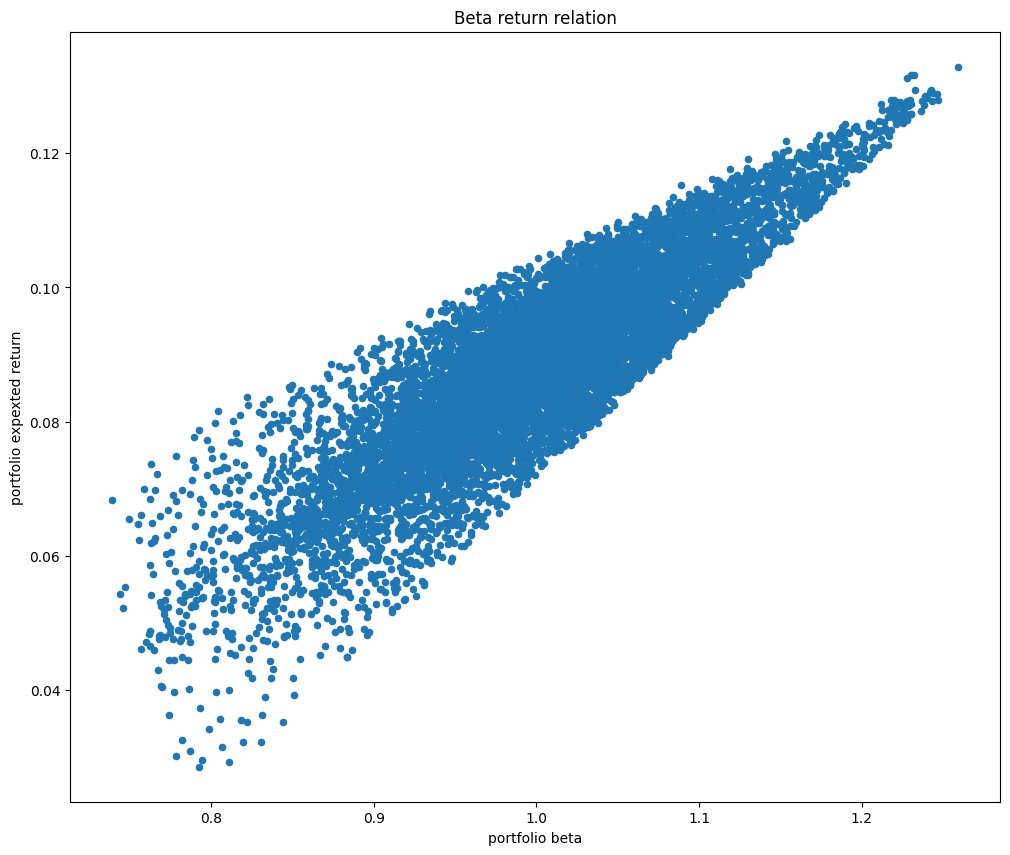

In [9]:
# portfolio 함수 사용.

samElec.portfolio([1.2,0.7,1.3],엔비디아=0.12,애플 = 0.07,코카콜라=0.14) # [베타], 기업명 = 수익률